In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from distfit import distfit
from mat4py import loadmat

In [16]:

def load_data():
    powerdata_path = r"./data/siemens/hourly_avg_wind_speed_and_power.mat"
    pricedata_path = r"./data/siemens/da_price_data_dk1_10AM.csv"

    powerdata_dict_list = loadmat(powerdata_path, meta=False)
    pricedata = pd.read_csv(pricedata_path)
    pricedata = pricedata[['nominal', 'forecast']]
    pricedata.dropna(inplace=True)
    pricedata['error'] = pricedata['forecast'] - pricedata['nominal']

    # Get data out of singleton lists
    powerdata_dict = {}
    for key in powerdata_dict_list.keys():
        powerdata_dict[key] = [l[0] for l in powerdata_dict_list[key]]
    powerdata = pd.DataFrame(powerdata_dict)
    nominal_power = 3000
    powerdata['nominal'] = powerdata['hourly_avg_RE_wp'] / nominal_power * 10
    powerdata['forecast'] = powerdata['hourly_avg_FC_wp'] / nominal_power * 10
    powerdata['error'] = (powerdata['hourly_avg_FC_wp'] - powerdata['hourly_avg_RE_wp'])  / nominal_power * 10
    powerdata = powerdata[['nominal', 'forecast', 'error']]
    return powerdata, pricedata

powerdata, pricedata = load_data()

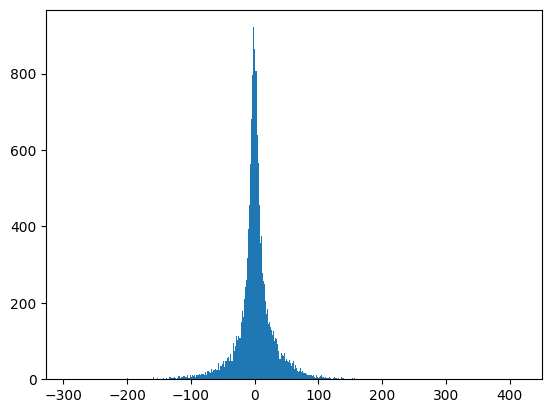

In [17]:

xs = range(pricedata.shape[0])
fig, ax = plt.subplots()
ax.hist(pricedata['error'].to_numpy(), bins="auto", label="Error")


fig.show()

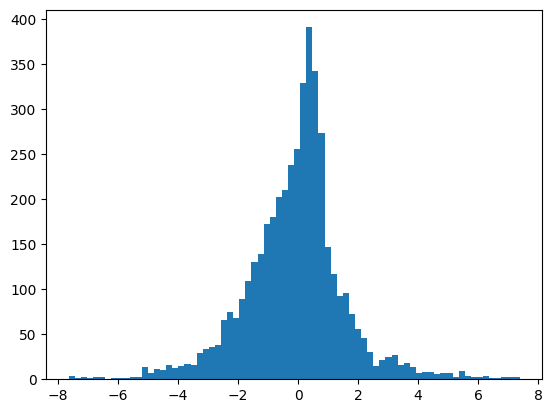

In [18]:
xs = range(pricedata.shape[0])
fig, ax = plt.subplots()
ax.hist(powerdata['error'].to_numpy(), bins="auto", label="Error")


fig.show()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0840177] [loc=-0.091 scale=1.667]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.610545] [loc=-7.645 scale=7.554]
[distfit] >[pareto    ] [0.00 sec] [RSS: 0.610545] [loc=-1073741831.645 scale=1073741824.000]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0467149] [loc=-0.083 scale=1.236]
[distfit] >[t         ] [0.10 sec] [RSS: 0.0388812] [loc=-0.037 scale=1.143]
[distfit] >[genextreme] [0.13 sec] [RSS: 0.118031] [loc=-0.744 scale=1.745]
[distfit] >[gamma     ] [0.06 sec] [RSS: 0.084611] [loc=-140.896 scale=0.020]
[distfit] >[lognorm   ] [0.15 sec] [RSS: 0.0843918] [loc=-198.140 scale=198.046]
[distfit] >[beta      ] [0.05 sec] [RSS: 0.0840174] [loc=-2863.332 scale=5302.058]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.505342] [loc=-7.645 scale=15.030]
[distfit] >[loggamma  ] [0.06 sec] [RSS: 0.0838503] [loc=-385.252 scale=55.090]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..
[distfit] >plot

Text(0, 0.5, 'Residuam Sum of Squares (RSS)')

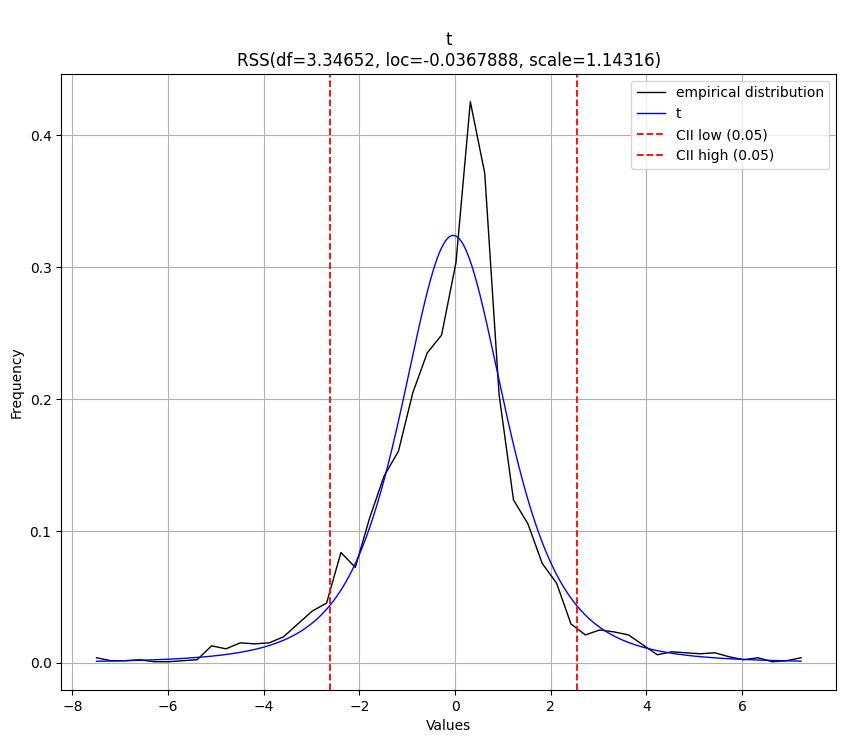

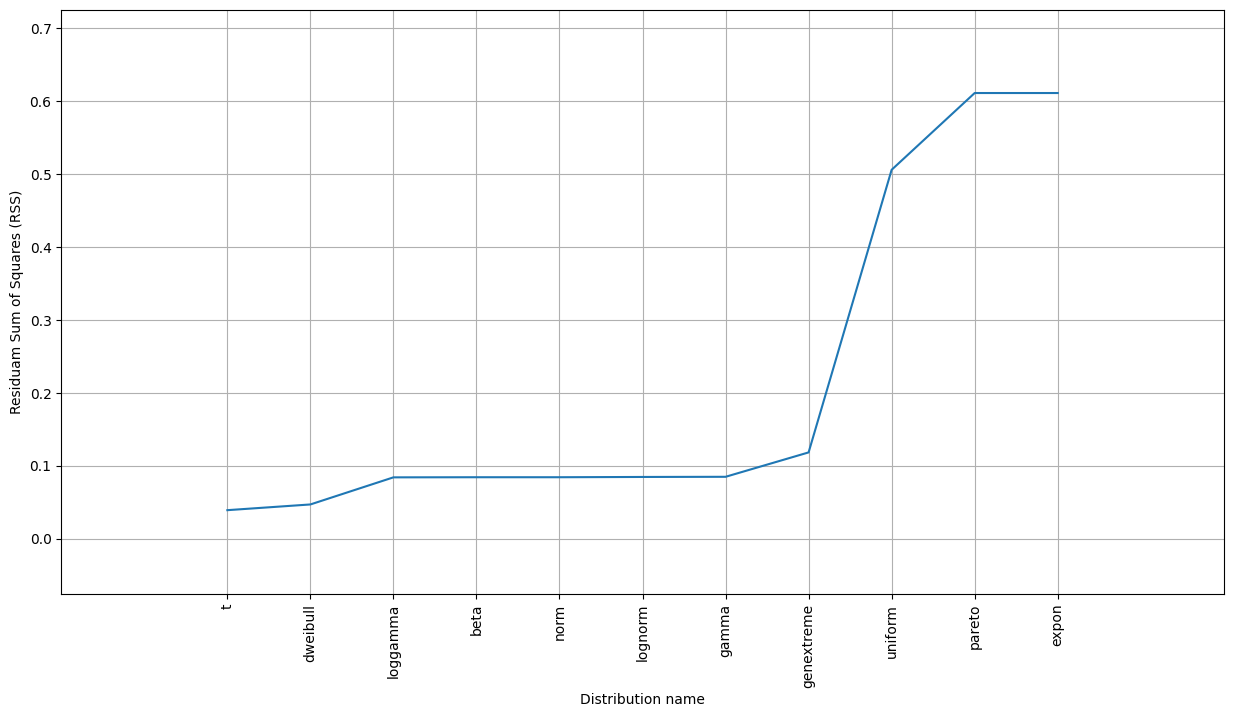

In [19]:

# Initialize model
dist = distfit()

# Find best theoretical distribution for empirical data X
dist.fit_transform(powerdata['error'])
fig, ax = dist.plot()
# ax.set_title("")
# fig.savefig("plot_best.pdf")

# Make plot
fig, ax = dist.plot_summary()
ax.set_title("")
ax.set_ylabel("Residuam Sum of Squares (RSS)")